# Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Loading the "Aldi" supermarket data

In [2]:
df_aldi = pd.read_csv("datasets/All_Data_Aldi.csv")
df_aldi.head()

,supermarket,prices_(¬£),prices_unit_(¬£),unit,names,date,category,own_brand
0,Aldi,1.39,1.20,l,Almat So Soft Luxurious Fabric Conditioner- Li...,20240211,household,False
1,Aldi,1.25,0.02,unit,Softly Balmsam Regular Tissues 80 Sheets 1 Pack,20240211,household,False
2,Aldi,2.55,0.01,unit,Saxon Ultra Kitchen Towels 2 Rolls,20240211,household,False
3,Aldi,2.99,8.80,kg,Purewick Sweet Blossom Fragranced Candle 340g,20240211,household,False
4,Aldi,1.49,0.00,unit,Saxon Aloe Vera 3 Ply Toilet Tissue 4 Pack,20240211,household,False


# Modifying the column names and changing the format of the date column

In [3]:
# changing the name of the columns
df_aldi = df_aldi.rename(columns = {'prices_(¬£)' : 'prices_pounds' , 'prices_unit_(¬£)' : 'per_unit_price'})

In [4]:
# Correcting data types: Convert the 'date' column to datetime format
df_aldi['date'] = pd.to_datetime(df_aldi['date'], format='%Y%m%d')

In [5]:
print("The shape of the Aldi dataset is {}".format(df_aldi.shape))

The shape of the Aldi dataset is (159524, 8)


In [6]:
print("The column names in Aldi dataset - {}".format(df_aldi.columns))

The column names in Aldi dataset - Index(['supermarket', 'prices_pounds', 'per_unit_price', 'unit', 'names',
       'date', 'category', 'own_brand'],
      dtype='object')


# Information about the data

In [7]:
df_aldi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159524 entries, 0 to 159523
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   supermarket     159524 non-null  object        
 1   prices_pounds   159524 non-null  float64       
 2   per_unit_price  159520 non-null  float64       
 3   unit            159520 non-null  object        
 4   names           159524 non-null  object        
 5   date            159524 non-null  datetime64[ns]
 6   category        159524 non-null  object        
 7   own_brand       159524 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), object(4)
memory usage: 8.7+ MB


# Check for null values

In [8]:
df_aldi.isnull().sum()

supermarket       0
prices_pounds     0
per_unit_price    4
unit              4
names             0
date              0
category          0
own_brand         0
dtype: int64

In [9]:
# Checking which rows are null
aldi_null = df_aldi[df_aldi.isnull().any(axis=1)]
print(aldi_null)

       supermarket  prices_pounds  per_unit_price unit  \
32546         Aldi           0.65             NaN  NaN   
36734         Aldi           0.65             NaN  NaN   
150457        Aldi           0.65             NaN  NaN   
155823        Aldi           0.65             NaN  NaN   

                                                    names       date  \
32546   Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-05   
36734   Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-04   
150457  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-10   
155823  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-09   

         category  own_brand  
32546   household      False  
36734   household      False  
150457  household      False  
155823  household      False  


In [10]:
df_aldi.iloc[32546]

supermarket                                                    Aldi
prices_pounds                                                  0.65
per_unit_price                                                  NaN
unit                                                            NaN
names             Saxon Biodegradable Toilet Tissue Wipes - Fine...
date                                            2024-02-05 00:00:00
category                                                  household
own_brand                                                     False
Name: 32546, dtype: object

In [11]:
rows_starting_with_saxon = df_aldi[df_aldi['names'].str.startswith('Saxon Biodegradable Toilet')]
print(rows_starting_with_saxon)

       supermarket  prices_pounds  per_unit_price unit  \
32546         Aldi           0.65             NaN  NaN   
36734         Aldi           0.65             NaN  NaN   
150457        Aldi           0.65             NaN  NaN   
155823        Aldi           0.65             NaN  NaN   

                                                    names       date  \
32546   Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-05   
36734   Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-02-04   
150457  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-10   
155823  Saxon Biodegradable Toilet Tissue Wipes - Fine... 2024-01-09   

         category  own_brand  
32546   household      False  
36734   household      False  
150457  household      False  
155823  household      False  


## Dropping the null values

In [12]:
df_aldi.dropna(inplace = True)
print("\nChecking for null values:\n{}".format(df_aldi.isnull().sum()))


Checking for null values:
supermarket       0
prices_pounds     0
per_unit_price    0
unit              0
names             0
date              0
category          0
own_brand         0
dtype: int64


# Visualizations

### Bar graph for average prices per unit for each product category

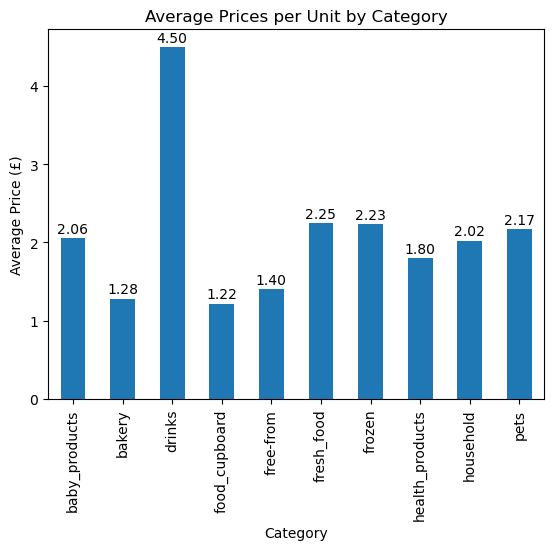

In [22]:
# Bar graph
avg_prices_aldi = df_aldi.groupby("category")["prices_pounds"].mean()
ax_aldi = avg_prices_aldi.plot(kind = "bar")
plt.title("Average Prices per Unit by Category")
plt.xlabel("Category")
plt.ylabel("Average Price (£)")

# Annotating the bars with values
for i, v in enumerate(avg_prices_aldi):
    ax_aldi.text(i, v + 0.03, f'{v:.2f}', ha = 'center', va = 'bottom')

plt.show()

The average price for `drinks` is significantly higher than for any other category

### Histogram for distribution of prices for a particular product category

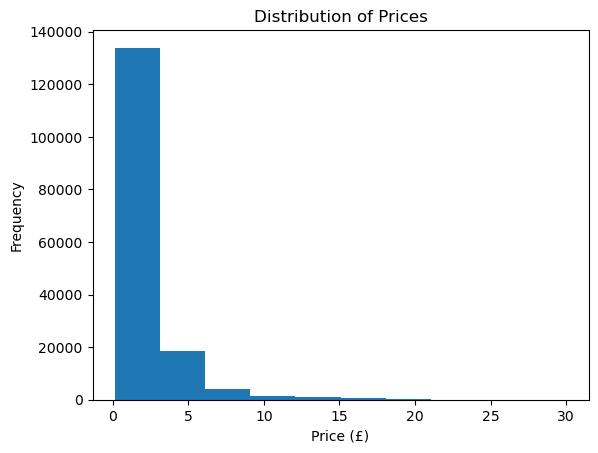

In [14]:
# Histogram
plt.hist(df_aldi["prices_pounds"], bins = 10)
plt.title("Distribution of Prices")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.show()

From the above histogram -
* The price of most products in this category falls between £5 and £15.
* There are a few outliers that are more expensive than £15.
* The distribution is positively skewed, meaning there are more products towards the lower end of the price range.

### Line graph for price trends over time

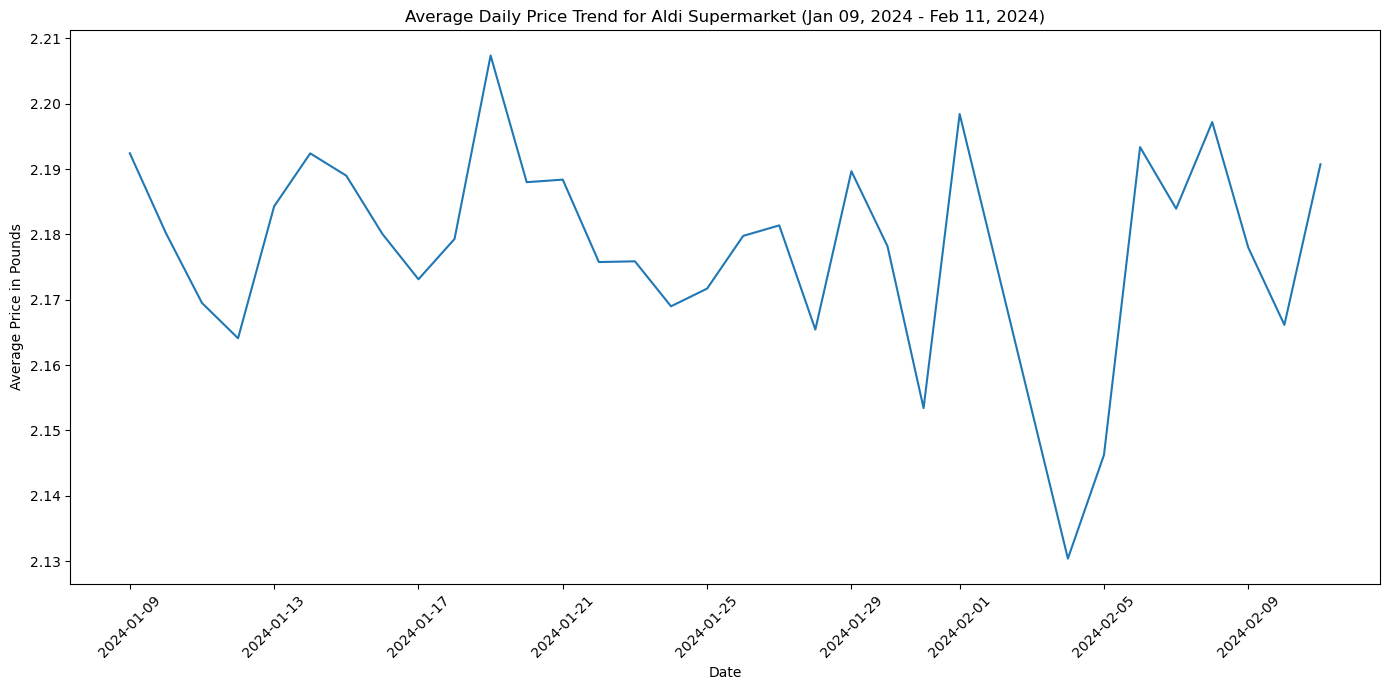

In [15]:
# Line graph
df_aldi['date'] = pd.to_datetime(df_aldi['date']) 
daily_price_trends_aldi = df_aldi.groupby(df_aldi['date'])['prices_pounds'].mean().reset_index()

plt.figure(figsize = (14, 7))
sns.lineplot(data = daily_price_trends_aldi, x = 'date', y = 'prices_pounds')
plt.title('Average Daily Price Trend for Aldi Supermarket (Jan 09, 2024 - Feb 11, 2024)')
plt.xlabel('Date')
plt.ylabel('Average Price in Pounds')
plt.xticks(rotation = 45)
plt.tight_layout() 
plt.show()

The average daily price trends for `Aldi` supermarket has been increasing over the past few weeks. There is a slight upward trend in the graph, but the increase is not very substantial.

### Box plot for distribution of prices for each product category

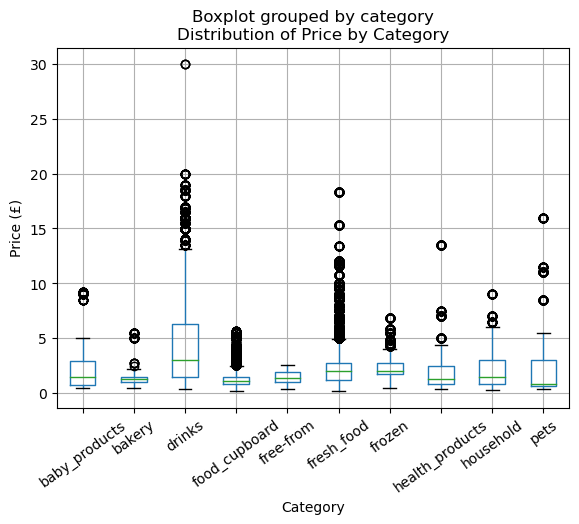

In [16]:

df_aldi.boxplot(column = "prices_pounds", by = "category")
plt.title("Distribution of Price by Category")
plt.xlabel("Category")
plt.ylabel("Price (£)")
plt.xticks(rotation = 36)
plt.show()

### Outliers: 
There are outliers in several categories, including `baby_products`, `bakery`, `drinks`, and `frozen`. These outliers represent prices that are significantly higher or lower than the rest of the data points in their respective categories.

### Pie chart for proportion of prices contributed by each product category

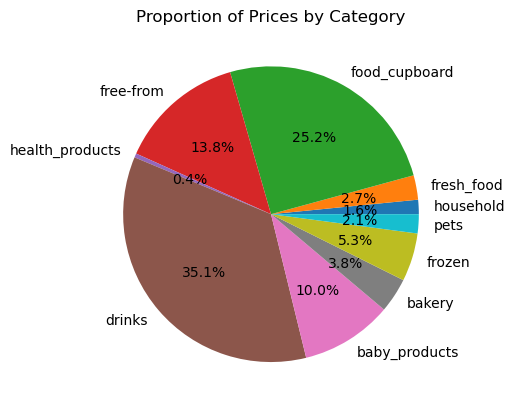

In [17]:
# Pie chart
plt.pie(df_aldi.groupby("category")["prices_pounds"].sum(), 
        labels = df_aldi["category"].unique(), 
        autopct = '%1.1f%%')

plt.title("Proportion of Prices by Category")

plt.show()

### From the pie chart -
* `drinks` has the highest number of products within `Aldi` supermarket with a total of 35.1%
* `food_cupboard` is the next highest category with 25.2% and so on

### Average Price Comparison: Own Brand vs. Non-Own Brand

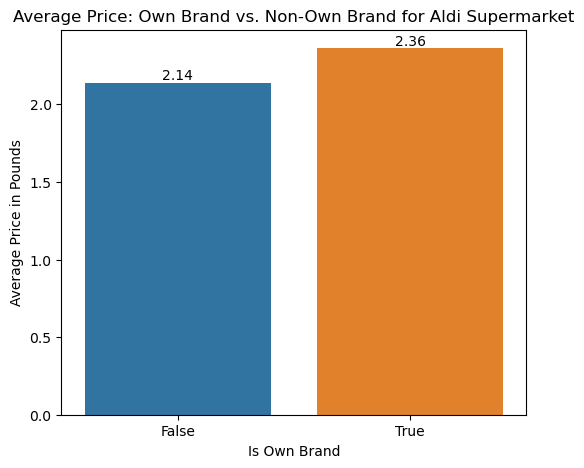

In [35]:
own_brand_prices_aldi = df_aldi.groupby('own_brand')['prices_pounds'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x = 'own_brand', 
            y = 'prices_pounds', 
            data=own_brand_prices_aldi)

plt.title('Average Price: Own Brand vs. Non-Own Brand for Aldi Supermarket')
plt.xlabel('Is Own Brand')
plt.ylabel('Average Price in Pounds')

# Displaying values on top of bars with a little gap
for index, row in own_brand_prices_aldi.iterrows():
    plt.text(index, row['prices_pounds'] + 0.02, round(row['prices_pounds'], 2), 
             color = 'black', 
             ha = "center")

plt.show()

# Correlation Matrix

In [36]:
# Extract only the 'date' column and 'prices_pounds' column
df_aldi_corr = df_aldi[['date', 'prices_pounds']]

# Compute correlation matrix
correlation_matrix_aldi = df_aldi_corr.corr()

print("Correlation Matrix:")
print(correlation_matrix_aldi)

Correlation Matrix:
                   date  prices_pounds
date           1.000000      -0.001124
prices_pounds -0.001124       1.000000


### Observations - 
* Based on the correlation coefficient, there is no meaningful linear relationship between the `date` and `prices_pounds` columns. In other words, the date of the observation does not have a significant impact on the prices in pounds.
* It's important to note that correlation coefficients only measure linear relationships, so there could still be other types of relationships (**nonlinear or time-dependent relationships**) that are not captured by this analysis.

## Different values present within `category`

In [20]:
aldi_category_value = df_aldi['category'].value_counts()
print("\nThe different values in category:\n{}".format(aldi_category_value))


The different values in category:
category
fresh_food         54291
food_cupboard      39391
drinks             19490
frozen             15615
household           9053
health_products     7337
bakery              7247
pets                3342
baby_products       2652
free-from           1102
Name: count, dtype: int64


In [21]:
aldi_ownBrand_value = df_aldi['own_brand'].value_counts()
print("\nNumber of items owned by Aldi and not owned by Aldi:\n{}".format(aldi_ownBrand_value))


Number of items owned by Aldi and not owned by Aldi:
own_brand
False    132169
True      27351
Name: count, dtype: int64
